In [33]:
from matplotlib import pyplot as plt
import pandas as pd
import torch
from torch.nn import *
import tensorflow as tf
%matplotlib inline

data = pd.read_csv("dataset.csv", encoding='utf-8')
X = data.iloc[:,:2].values[:]
Y = data['target'].values[:]
# Y = tf.one_hot(Y, 2)
print("Y is", Y.shape)
print("x is", X[:5])
num_features = X.shape[1]

neuron = nn.Sequential(Linear(num_features, out_features=1), Sigmoid())
neuron(torch.autograd.Variable(torch.FloatTensor(2)))
prob_pred = neuron(torch.autograd.Variable(torch.FloatTensor(X)))
y_pred = prob_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1) # reshape into line

Y is (1002,)
x is [[0.77942731 0.25730527]
 [0.77700501 0.0159154 ]
 [0.97709225 0.30420962]
 [0.0430319  0.1408993 ]
 [0.76043337 0.19312296]]


In [34]:
# plt.figure(figsize=(8, 6))
# plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='brg')
# plt.title('Гавиал и крокодил', fontsize=15)
# plt.xlabel('Тон окраски', fontsize=14)
# plt.ylabel('Ширина мордочки', fontsize=14)
# plt.show()

import numpy as np
from numpy import *

In [35]:
X = torch.autograd.Variable(torch.FloatTensor(X))
Y = torch.autograd.Variable(torch.FloatTensor(Y))
loss_func = torch.nn.KLDivLoss()
learning_rate = 1e-5
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
num_epochs = 300

for i in range(num_epochs):
    y_pred = neuron(X)
#     # print("y_pred = ", y_pred.size())
#     # print("Y = ", Y)
#     # print("Y size = ", Y.size())
#     # break
# #     # y_pred = y_pred.long()
# #     # print("ypreeed is ", y_pred)
# #     # break
# #     # print("loss is: ", loss_func(Y, torch.max(y_pred, 1)[1]))
# #     # for j in range(len(Y)):
    loss = loss_func(Y, y_pred)
    if i < 5:
        print(f'Iter: {i} -> Loss: {loss.data}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Iter: 0 -> Loss: -0.5744235515594482


RuntimeError: output with shape [1002, 1] doesn't match the broadcast shape [1002, 1002] (compute_shape at /pytorch/aten/src/ATen/native/TensorIterator.cpp:819)
frame #0: c10::Error::Error(c10::SourceLocation, std::string const&) + 0x46 (0x7f9d3f8cd536 in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libc10.so)
frame #1: at::TensorIterator::compute_shape() + 0x6aa (0x7f9d7d373a5a in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #2: at::TensorIterator::build() + 0x3c (0x7f9d7d3773fc in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #3: at::TensorIterator::binary_op(at::Tensor&, at::Tensor const&, at::Tensor const&, bool) + 0x146 (0x7f9d7d377ab6 in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #4: at::native::sub_out(at::Tensor&, at::Tensor const&, at::Tensor const&, c10::Scalar) + 0x4d (0x7f9d7d096e8d in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #5: <unknown function> + 0x107f9bd (0x7f9d7d5ba9bd in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #6: <unknown function> + 0x2a8cc66 (0x7f9d7efc7c66 in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #7: torch::autograd::generated::KlDivBackward::apply(std::vector<at::Tensor, std::allocator<at::Tensor> >&&) + 0x7cf (0x7f9d7edea4cf in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #8: <unknown function> + 0x2d89705 (0x7f9d7f2c4705 in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #9: torch::autograd::Engine::evaluate_function(std::shared_ptr<torch::autograd::GraphTask>&, torch::autograd::Node*, torch::autograd::InputBuffer&) + 0x16f3 (0x7f9d7f2c1a03 in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #10: torch::autograd::Engine::thread_main(std::shared_ptr<torch::autograd::GraphTask> const&, bool) + 0x3d2 (0x7f9d7f2c27e2 in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #11: torch::autograd::Engine::thread_init(int) + 0x39 (0x7f9d7f2bae59 in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_cpu.so)
frame #12: torch::autograd::python::PythonEngine::thread_init(int) + 0x38 (0x7f9d8bbfe5f8 in /home/urbakhanova/.local/lib/python3.8/site-packages/torch/lib/libtorch_python.so)
frame #13: <unknown function> + 0xd6cb4 (0x7f9dc0955cb4 in /lib/x86_64-linux-gnu/libstdc++.so.6)
frame #14: <unknown function> + 0x9609 (0x7f9dc339a609 in /lib/x86_64-linux-gnu/libpthread.so.0)
frame #15: clone + 0x43 (0x7f9dc34d6103 in /lib/x86_64-linux-gnu/libc.so.6)


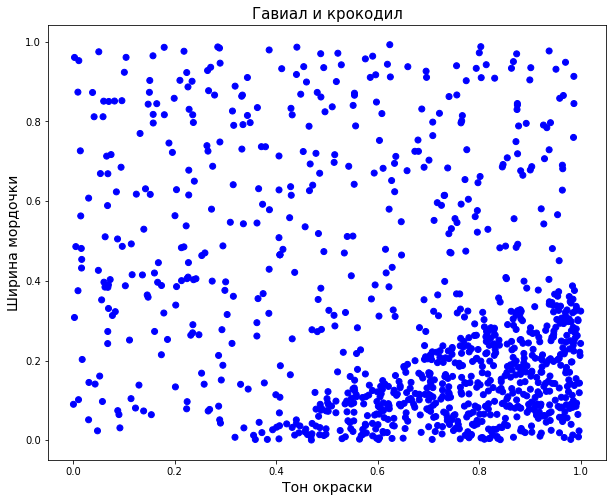

In [36]:
proba_pred = neuron(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='brg')
plt.title('Гавиал и крокодил', fontsize=15)
plt.xlabel('Тон окраски', fontsize=14)
plt.ylabel('Ширина мордочки', fontsize=14)
plt.show();